# Análisis Exploratorio (Divorcios)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Leemos los datos del CSV

In [2]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

#Configurar pandas para que muestre todas las filas
pd.set_option('display.max_rows', None)

In [5]:
data = pd.read_csv('VIF.csv')

C:\Users\n8nug\AppData\Local\Temp\ipykernel_24376\1507728952.py:1: DtypeWarning: Columns (12,13,14,15,16,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('VIF.csv')


<small>

Haremos una exploración rápida de los datos, para ello estaremos trabajando un resumen del conjunto de datos.

Primero, separaremos qué variables con cuantitativas y cuáles son cualitativas.

</small>

In [6]:
# Lista de variables cuantitativas (numéricas)
quantitative_columns = [
    "HEC_DIA", "HEC_MES", "HEC_ANO",  # Fecha del hecho
    "DIA_EMISION", "MES_EMISION", "ANO_EMISION",  # Fecha de emisión de la denuncia
    "VIC_EDAD", "TOTAL_HIJOS", "NUM_HIJ_HOM", "NUM_HIJ_MUJ",  # Datos de la víctima
    "AGR_EDAD", "AGRESORES_OTROS_TOTAL", "AGR_OTROS_HOM", "AGR_OTRAS_MUJ", 
    "AGR_OTROS_N_OS", "AGR_OTRAS_N_AS"  # Datos del agresor y otros agresores
]

# Lista de variables cualitativas (categóricas)
cualitative_columns = [
    "HEC_DEPTOMCPIO", "HEC_TIPAGRE", "DEPTO_MCPIO", "QUIEN_REPORTA",  # Ubicación y reporte
    "VIC_SEXO", "VIC_ALFAB", "VIC_ESCOLARIDAD", "VIC_EST_CIV", "VIC_GRUPET", 
    "VIC_NACIONAL", "VIC_TRABAJA", "VIC_OCUP", "VIC_DEDICA", "VIC_DISC", "TIPO_DISCAQ",
    "VIC_REL_AGR", "HEC_AREA", "HEC_RECUR_DENUN", "INST_DONDE_DENUNCIO",  # Datos de la víctima
    "AGR_SEXO", "AGR_ALFAB", "AGR_ESCOLARIDAD", "AGR_EST_CIV", "AGR_GURPET", 
    "AGR_NACIONAL", "AGR_TRABAJA", "AGR_OCUP", "AGR_DEDICA",  # Datos del agresor
    "INST_DENUN_HECHO", "LEY_APLICABLE", "MEDIDAS_SEGURIDAD", "TIPO_MEDIDA"  # Denuncia y medidas
]

<small>Usamos `data.describe()` en Python para obtener un resumen estadístico rápido de los datos en un DataFrame de pandas. Este método proporciona información esencial como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada columna numérica. Esto nos ayuda a entender mejor la distribución y las características generales de los datos, identificar posibles valores atípicos y guiar el análisis exploratorio de datos.</small>


In [7]:
data[quantitative_columns].describe()

,HEC_DIA,HEC_MES,HEC_ANO,DIA_EMISION,MES_EMISION,ANO_EMISION,VIC_EDAD,AGR_EDAD,AGRESORES_OTROS_TOTAL,AGR_OTROS_HOM,AGR_OTRAS_MUJ,AGR_OTROS_N_OS,AGR_OTRAS_N_AS
count,34330.000000,34330.000000,34330.000000,34330.000000,34330.000000,34330.0,34330.000000,34330.000000,34330.000000,34330.000000,34330.000000,34330.000000,34330.000000
mean,16.819400,8.079318,2173.758899,15.262220,6.210749,2014.0,33.108273,37.913079,57.500379,57.413778,57.433673,57.386455,57.384853
std,14.636292,13.415853,1118.240164,8.805635,3.364971,0.0,14.292446,18.768905,48.723820,48.823033,48.800013,48.854740,48.856608
min,1.000000,1.000000,2000.000000,1.000000,1.000000,2014.0,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2014.000000,7.000000,3.000000,2014.0,23.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,6.000000,2014.000000,15.000000,6.000000,2014.0,30.000000,33.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.0,39.000000,42.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,99.000000,99.000000,9999.000000,31.000000,12.000000,2014.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


<small>
El método `pd.info()` en pandas se utiliza para obtener un resumen conciso de un DataFrame. Proporciona información sobre:

- El número de filas y columnas.
- Los nombres de las columnas
- El tipo de datos de cada columna.
- El número de valores no nulos en cada columna.

Esto es útil para entender rápidamente la estructura y las características básicas del conjunto de datos antes de realizar un análisis más profundo.
</small>


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34330 entries, 0 to 34329
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   HEC_DIA                34330 non-null  int64 
 1   HEC_MES                34330 non-null  int64 
 2   HEC_ANO                34330 non-null  int64 
 3   HEC_DEPTOMCPIO         34330 non-null  int64 
 4   HEC_TIPAGRE            34330 non-null  int64 
 5   DIA_EMISION            34330 non-null  int64 
 6   MES_EMISION            34330 non-null  int64 
 7   ANO_EMISION            34330 non-null  int64 
 8   DEPTO_MCPIO            34330 non-null  int64 
 9   QUIEN_REPORTA          34330 non-null  int64 
 10  VIC_SEXO               34330 non-null  int64 
 11  VIC_EDAD               34330 non-null  int64 
 12  TOTAL_HIJOS            34330 non-null  object
 13  NUM_HIJ_HOM            34330 non-null  object
 14  NUM_HIJ_MUJ            34330 non-null  object
 15  VIC_ALFAB          

<small>`isnull().sum()` nos sirve para saber la suma de cuántos valores son nulos para cada columna de nuestro dataset.</small>

In [9]:
print(data.isnull().sum())

HEC_DIA                      0
HEC_MES                      0
HEC_ANO                      0
HEC_DEPTOMCPIO               0
HEC_TIPAGRE                  0
DIA_EMISION                  0
MES_EMISION                  0
ANO_EMISION                  0
DEPTO_MCPIO                  0
QUIEN_REPORTA                0
VIC_SEXO                     0
VIC_EDAD                     0
TOTAL_HIJOS                  0
NUM_HIJ_HOM                  0
NUM_HIJ_MUJ                  0
VIC_ALFAB                    0
VIC_ESCOLARIDAD              0
VIC_EST_CIV                  0
VIC_GRUPET                   0
VIC_NACIONAL                 0
VIC_TRABAJA                  0
VIC_OCUP                     0
VIC_DEDICA                   0
VIC_DISC                     0
TIPO_DISCAQ                  0
VIC_REL_AGR                  0
OTRAS_VICTIMAS               0
VIC_OTRAS_HOM                0
VIC_OTRAS_MUJ                0
VIC_OTRAS_N_OS               0
VIC_OTRAS_N_AS               0
HEC_AREA                     0
HEC_RECU

<small>Ahora que ya sabemos cuántos datos faltan, sería mucho mejor saber cuánto porcentaje de ellos falta:</small>


In [10]:
# Porcentaje de datos faltantes por columna
missing_data = (data.isnull().sum() / len(data)) * 100
print(missing_data)

HEC_DIA                   0.000000
HEC_MES                   0.000000
HEC_ANO                   0.000000
HEC_DEPTOMCPIO            0.000000
HEC_TIPAGRE               0.000000
DIA_EMISION               0.000000
MES_EMISION               0.000000
ANO_EMISION               0.000000
DEPTO_MCPIO               0.000000
QUIEN_REPORTA             0.000000
VIC_SEXO                  0.000000
VIC_EDAD                  0.000000
TOTAL_HIJOS               0.000000
NUM_HIJ_HOM               0.000000
NUM_HIJ_MUJ               0.000000
VIC_ALFAB                 0.000000
VIC_ESCOLARIDAD           0.000000
VIC_EST_CIV               0.000000
VIC_GRUPET                0.000000
VIC_NACIONAL              0.000000
VIC_TRABAJA               0.000000
VIC_OCUP                  0.000000
VIC_DEDICA                0.000000
VIC_DISC                  0.000000
TIPO_DISCAQ               0.000000
VIC_REL_AGR               0.000000
OTRAS_VICTIMAS            0.000000
VIC_OTRAS_HOM             0.000000
VIC_OTRAS_MUJ       

#### ¿Cuál es el propósito de hacer histogramas?

<small> Los histogramas son útiles para visualizar la distribución de datos numéricos. Permiten identificar rápidamente la forma de la distribución (normal, sesgada, bimodal, etc.), la presencia de valores atípicos y cómo están agrupados los valores. Este código genera histogramas de todas las variables numéricas en el conjunto de datos, ajustando el tamaño de la figura para una visualización clara.</small>


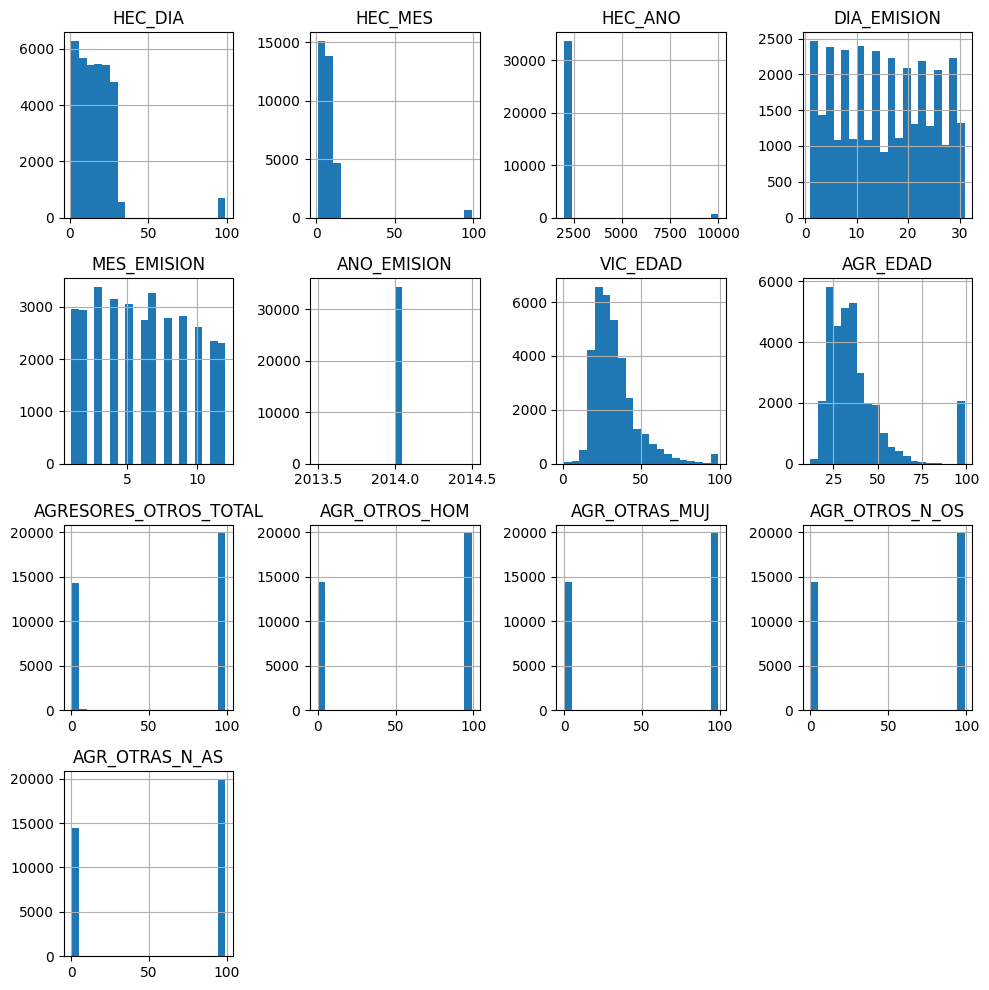

In [11]:
plot_columns = [col for col in quantitative_columns if col in data.columns]

data[plot_columns].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

#### ¿Cuál es el propósito de hacer box plots?

<small>Los gráficos de caja muestran la distribución de datos numéricos y son especialmente buenos para identificar valores atípicos y entender la dispersión de los datos (mediante cuartiles y medianas). Este código crea un gráfico de caja para cada variable numérica, organizándolos en una matriz de gráficos para facilitar la comparación.</small>


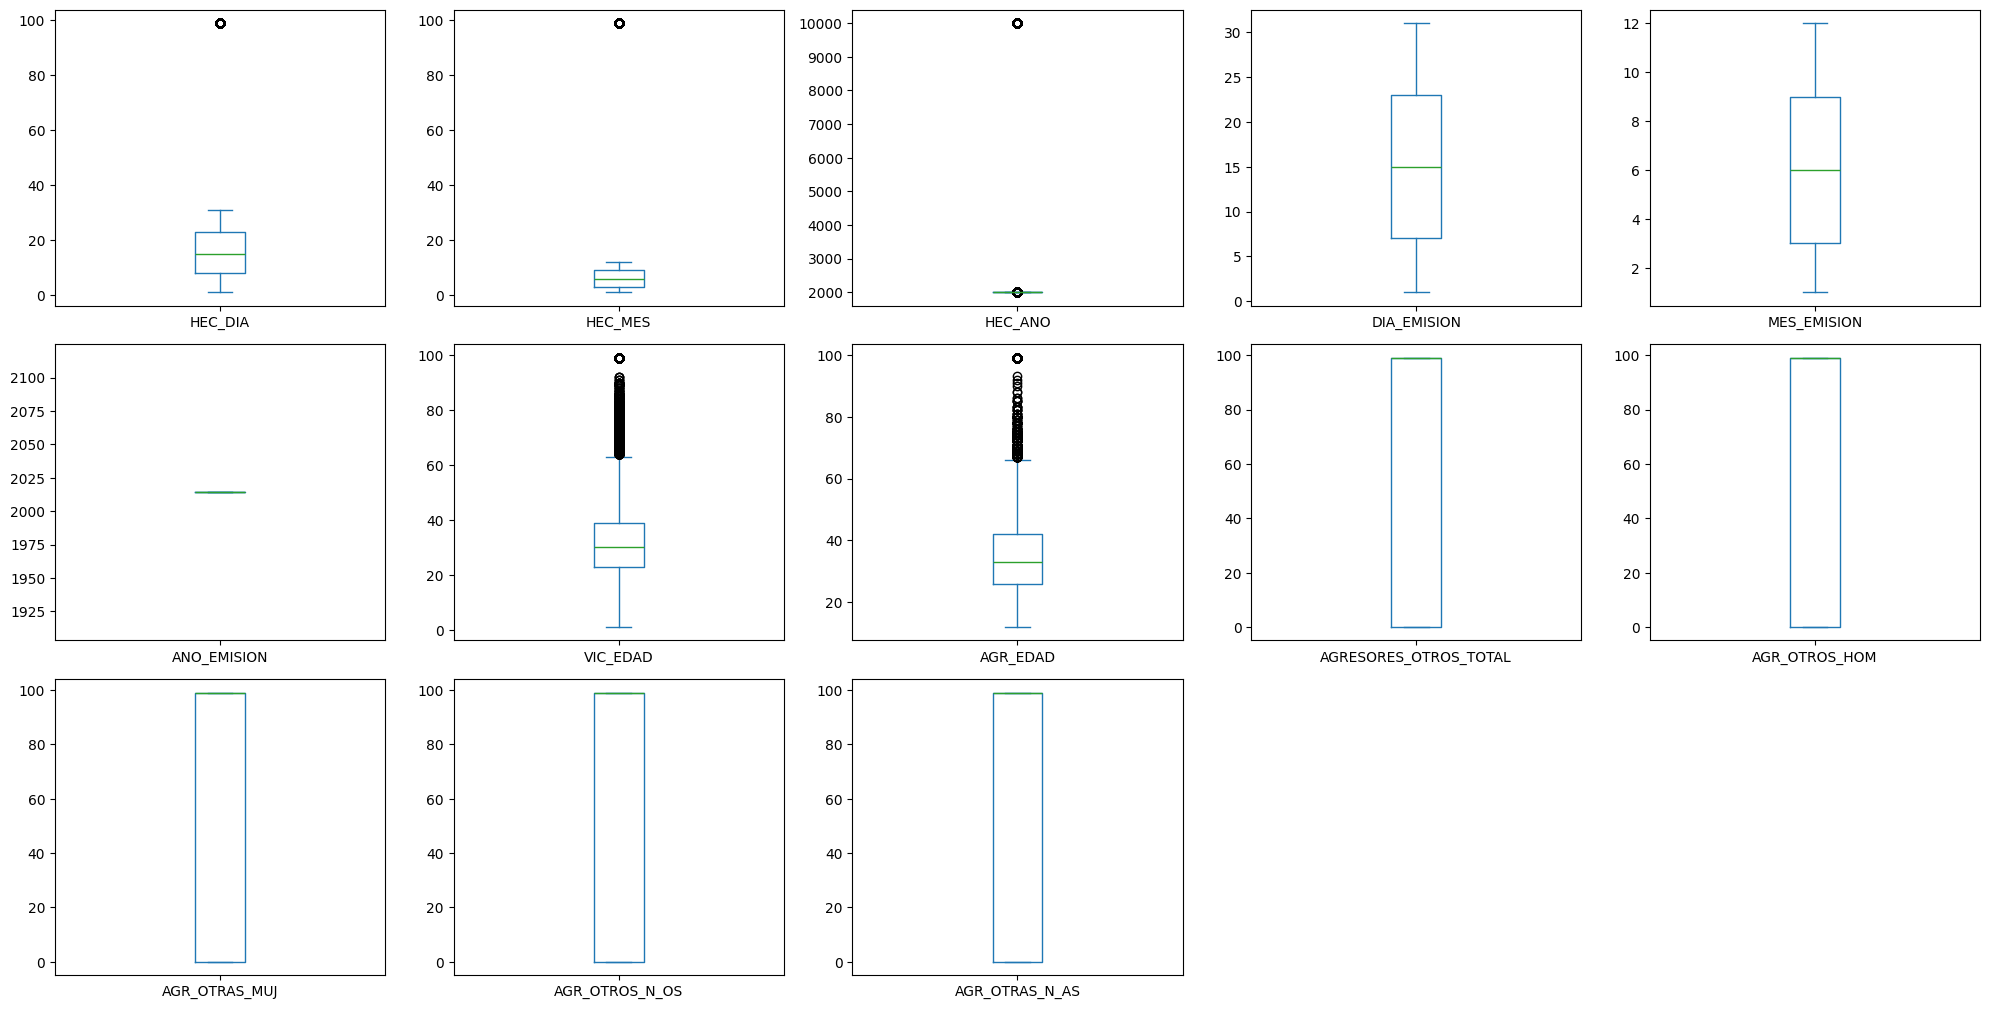

In [12]:
# Generar los box plots
plot_columns = [col for col in quantitative_columns if col in data.columns]
data[plot_columns].plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20))
plt.tight_layout()  # Ajusta el layout para evitar que los gráficos se sobrepongan
plt.show()

### Pruebas de Normalidad

--- HEC_DIA ---


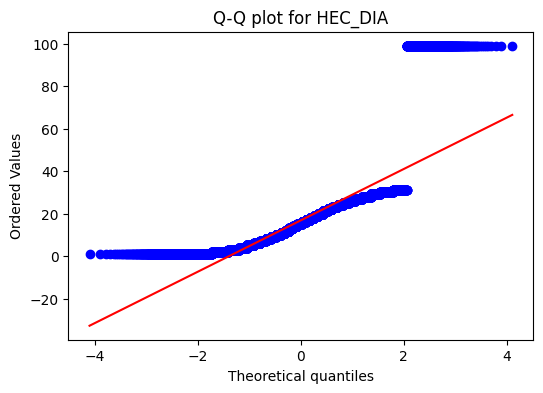

Kolmogorov-Smirnov Test for HEC_DIA:
Statistic: 0.14762107793590018, p-value: 0.0 (La distribución no es normal)


--- HEC_MES ---


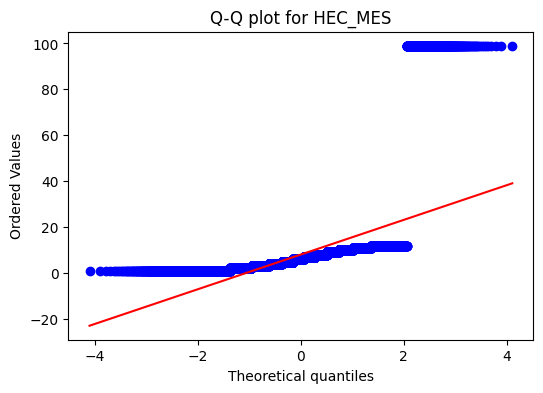

Kolmogorov-Smirnov Test for HEC_MES:
Statistic: 0.36503898170339033, p-value: 0.0 (La distribución no es normal)


--- HEC_ANO ---


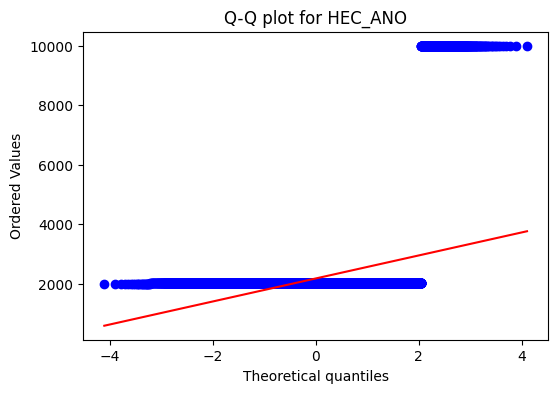

Kolmogorov-Smirnov Test for HEC_ANO:
Statistic: 0.536790483929636, p-value: 0.0 (La distribución no es normal)


--- DIA_EMISION ---


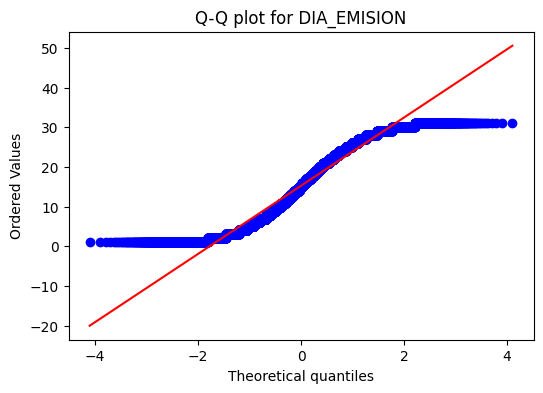

Kolmogorov-Smirnov Test for DIA_EMISION:
Statistic: 0.07746716747137888, p-value: 1.240813359237022e-179 (La distribución no es normal)


--- MES_EMISION ---


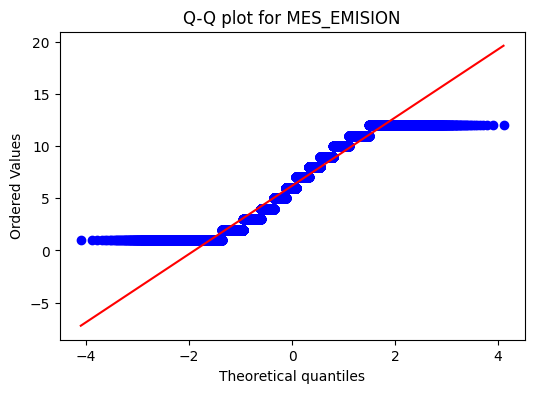

Kolmogorov-Smirnov Test for MES_EMISION:
Statistic: 0.10621781704763639, p-value: 0.0 (La distribución no es normal)


--- ANO_EMISION ---


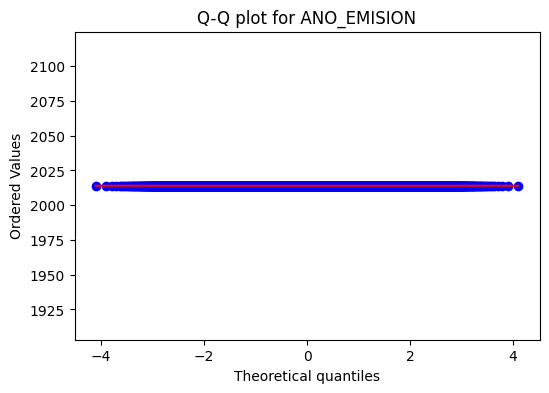

Kolmogorov-Smirnov Test for ANO_EMISION:
Statistic: nan, p-value: nan (La distribución no es normal)


--- VIC_EDAD ---


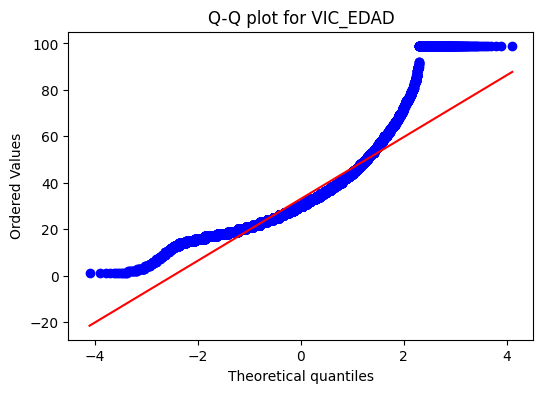

Kolmogorov-Smirnov Test for VIC_EDAD:
Statistic: 0.11886214849857457, p-value: 0.0 (La distribución no es normal)


--- TOTAL_HIJOS ---


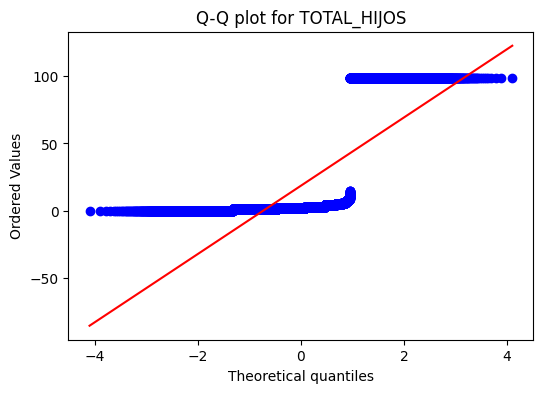

Kolmogorov-Smirnov Test for TOTAL_HIJOS:
Statistic: 0.4430505502102906, p-value: 0.0 (La distribución no es normal)


--- NUM_HIJ_HOM ---


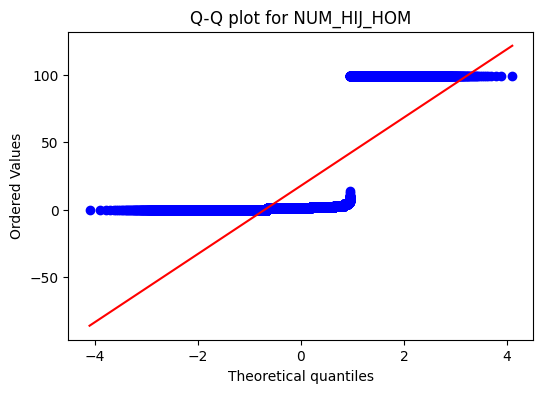

Kolmogorov-Smirnov Test for NUM_HIJ_HOM:
Statistic: 0.46426898719212073, p-value: 0.0 (La distribución no es normal)


--- NUM_HIJ_MUJ ---


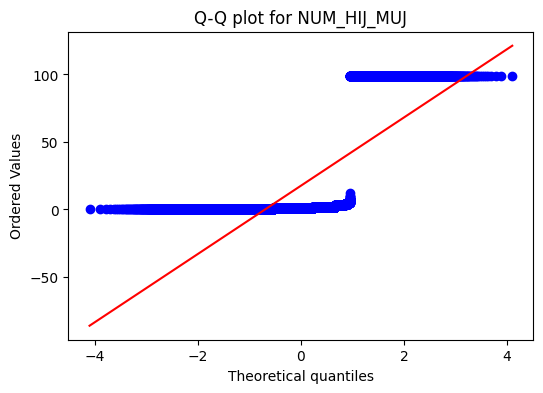

Kolmogorov-Smirnov Test for NUM_HIJ_MUJ:
Statistic: 0.46492300787974983, p-value: 0.0 (La distribución no es normal)


--- AGR_EDAD ---


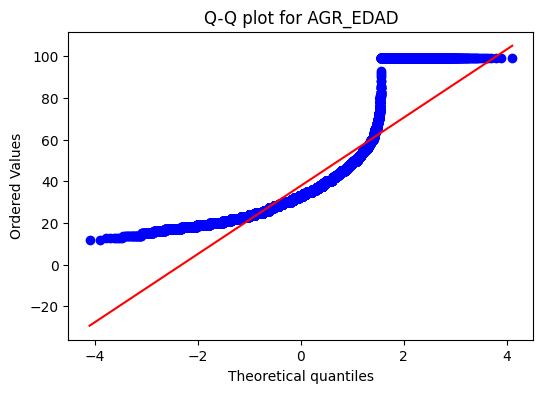

Kolmogorov-Smirnov Test for AGR_EDAD:
Statistic: 0.17979329179687376, p-value: 0.0 (La distribución no es normal)


--- AGRESORES_OTROS_TOTAL ---


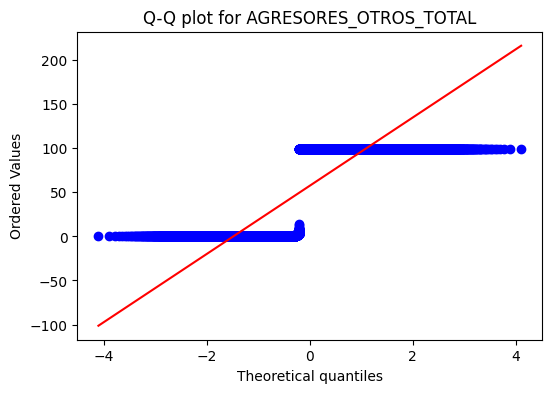

Kolmogorov-Smirnov Test for AGRESORES_OTROS_TOTAL:
Statistic: 0.38234076946602263, p-value: 0.0 (La distribución no es normal)


--- AGR_OTROS_HOM ---


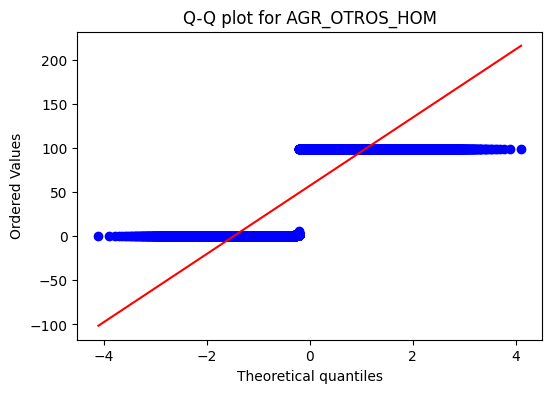

Kolmogorov-Smirnov Test for AGR_OTROS_HOM:
Statistic: 0.382352693539525, p-value: 0.0 (La distribución no es normal)


--- AGR_OTRAS_MUJ ---


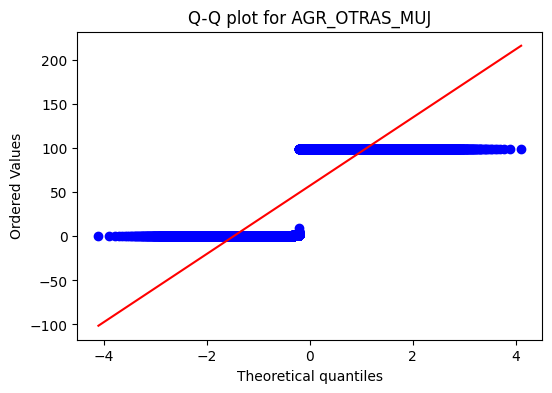

Kolmogorov-Smirnov Test for AGR_OTRAS_MUJ:
Statistic: 0.38235106074740716, p-value: 0.0 (La distribución no es normal)


--- AGR_OTROS_N_OS ---


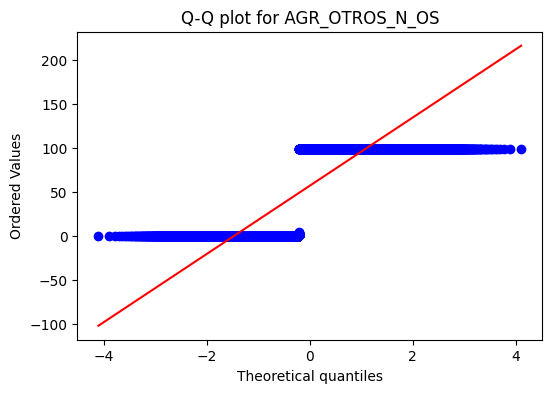

Kolmogorov-Smirnov Test for AGR_OTROS_N_OS:
Statistic: 0.38235448882627715, p-value: 0.0 (La distribución no es normal)


--- AGR_OTRAS_N_AS ---


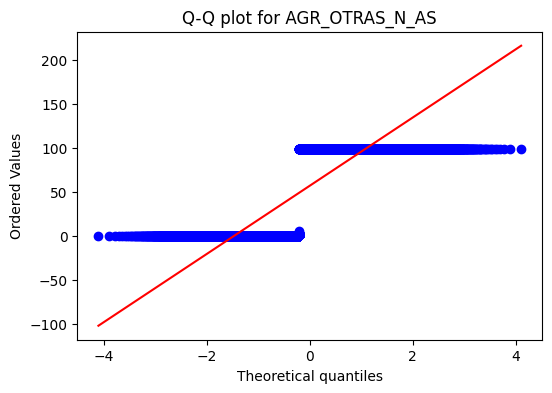

Kolmogorov-Smirnov Test for AGR_OTRAS_N_AS:
Statistic: 0.3823545518306653, p-value: 0.0 (La distribución no es normal)




In [14]:
normality_plot_columns = [col for col in plot_columns if col in data.columns]

# Realizar pruebas de normalidad y graficar QQ plots
results = []
for column in normality_plot_columns:
    print(f"--- {column} ---")
    # Filtrar solo datos numéricos
    numeric_data = pd.to_numeric(data[column], errors='coerce').dropna()
    
    # QQ Plot
    fig = plt.figure(figsize=(6, 4))
    res = stats.probplot(numeric_data, plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

    # Kolmogorov-Smirnov test for normality
    normed_data = (numeric_data - numeric_data.mean()) / numeric_data.std()
    ks_test = stats.kstest(normed_data, 'norm')
    normality_text = "La distribución es normal" if ks_test.pvalue > 0.05 else "La distribución no es normal"
    print(f"Kolmogorov-Smirnov Test for {column}:\nStatistic: {ks_test.statistic}, p-value: {ks_test.pvalue} ({normality_text})\n\n")

    results.append((column, ks_test.statistic, ks_test.pvalue, normality_text))


### Tabla de Frecuencias de Variables Cualitativas

<small> En este apartado, se muestran las tablas de frecuencia para diversas variables cualitativas dentro del _dataset_. Estas tablas muestran la cantidad de veces que cada valor único aparece en el conjunto de datos, proporcionando una visión clara de la distribución y prevalencia de las características observadas. Este análisis ayuda a identificar tendencias, valores atípicos y posibles inconsistencias en los datos.

In [15]:
freq_table = {col: data[col].value_counts() for col in cualitative_columns}

for column, table in freq_table.items():
    print(f"Tabla de frecuencias para la variable: {column}")
    display(table.reset_index().head(30)) 
    print("\n")

Tabla de frecuencias para la variable: HEC_DEPTOMCPIO


,HEC_DEPTOMCPIO,count
0,101,1789
1,1601,1100
2,108,1069
3,115,722
4,1001,697
5,401,652
6,117,543
7,114,513
8,106,500
9,2101,491




Tabla de frecuencias para la variable: HEC_TIPAGRE


,HEC_TIPAGRE,count
0,1122,13783
1,2122,10864
2,1222,3632
3,1121,2942
4,2121,1835
5,1112,383
6,2221,222
7,1111,213
8,2112,153
9,2212,131




Tabla de frecuencias para la variable: DEPTO_MCPIO


,DEPTO_MCPIO,count
0,101,2075
1,1601,1189
2,108,1014
3,1001,762
4,115,712
5,401,704
6,1101,642
7,2101,531
8,114,514
9,117,493




Tabla de frecuencias para la variable: QUIEN_REPORTA


,QUIEN_REPORTA,count
0,1,33064
1,2,659
2,9,389
3,3,218




Tabla de frecuencias para la variable: VIC_SEXO


,VIC_SEXO,count
0,2,31097
1,1,3233




Tabla de frecuencias para la variable: VIC_ALFAB


,VIC_ALFAB,count
0,1,14036
1,1,13254
2,2,4584
3,2,2170
4,9,108
5,9,93
6,,85




Tabla de frecuencias para la variable: VIC_ESCOLARIDAD


,VIC_ESCOLARIDAD,count
0,10,5089
1,26,2606
2,10,2423
3,26,2353
4,29,2161
5,29,1962
6,33,1424
7,49,1242
8,49,1204
9,46,1140




Tabla de frecuencias para la variable: VIC_EST_CIV


,VIC_EST_CIV,count
0,2,9470
1,2,5764
2,9,4651
3,3,4155
4,9,3313
5,3,3123
6,1,1701
7,1,1450
8,4,206
9,,198




Tabla de frecuencias para la variable: VIC_GRUPET


,VIC_GRUPET,count
0,1,19654
1,2,10823
2,6,3121
3,9,324
4,5,271
5,4,92
6,3,45




Tabla de frecuencias para la variable: VIC_NACIONAL


,VIC_NACIONAL,count
0,1,33861
1,2,237
2,9,232




Tabla de frecuencias para la variable: VIC_TRABAJA


,VIC_TRABAJA,count
0,2,12217
1,2,11313
2,1,6548
3,1,3996
4,9,86
5,,85
6,9,85




Tabla de frecuencias para la variable: VIC_OCUP


,VIC_OCUP,count
0,,23786
1,5249,1496
2,9111,1230
3,2341,879
4,6111,657
5,9211,524
6,9999,454
7,9510,415
8,4120,329
9,8153,310




Tabla de frecuencias para la variable: VIC_DEDICA


,VIC_DEDICA,count
0,1,22201
1,,10800
2,3,883
3,9,218
4,2,165
5,4,44
6,6,16
7,5,3




Tabla de frecuencias para la variable: VIC_DISC


,VIC_DISC,count
0,2,32465
1,9,1626
2,1,239




Tabla de frecuencias para la variable: TIPO_DISCAQ


,TIPO_DISCAQ,count
0,,34091
1,9,93
2,2,47
3,1,33
4,6,29
5,4,18
6,5,10
7,3,9




Tabla de frecuencias para la variable: VIC_REL_AGR


,VIC_REL_AGR,count
0,1,11800
1,2,10587
2,3,4716
3,10,2920
4,9,1485
5,6,1374
6,4,801
7,8,452
8,5,128
9,7,67




Tabla de frecuencias para la variable: HEC_AREA


,HEC_AREA,count
0,1,19164
1,2,14173
2,9,993




Tabla de frecuencias para la variable: HEC_RECUR_DENUN


,HEC_RECUR_DENUN,count
0,2,29096
1,1,3704
2,9,1530




Tabla de frecuencias para la variable: INST_DONDE_DENUNCIO


,INST_DONDE_DENUNCIO,count
0,,30626
1,4,1898
2,3,825
3,1,515
4,9,397
5,2,44
6,6,18
7,5,7




Tabla de frecuencias para la variable: AGR_SEXO


,AGR_SEXO,count
0,1,30302
1,2,4028




Tabla de frecuencias para la variable: AGR_ALFAB


,AGR_ALFAB,count
0,1,28802
1,2,4762
2,9,766




Tabla de frecuencias para la variable: AGR_ESCOLARIDAD


,AGR_ESCOLARIDAD,count
0,26,5725
1,10,5618
2,29,4527
3,33,2774
4,49,2387
5,46,2325
6,23,1803
7,39,1707
8,99,1637
9,22,1003




Tabla de frecuencias para la variable: AGR_EST_CIV


,AGR_EST_CIV,count
0,2,15326
1,3,7718
2,9,7706
3,1,3122
4,5,349
5,4,109




Tabla de frecuencias para la variable: AGR_GURPET


,AGR_GURPET,count
0,1,19214
1,2,10947
2,6,3200
3,9,513
4,5,285
5,4,113
6,3,58




Tabla de frecuencias para la variable: AGR_NACIONAL


,AGR_NACIONAL,count
0,1,32801
1,9,1343
2,2,186




Tabla de frecuencias para la variable: AGR_TRABAJA


,AGR_TRABAJA,count
0,1,27199
1,2,6009
2,9,1122




Tabla de frecuencias para la variable: AGR_OCUP


,AGR_OCUP,count
0,,7131
1,6111,6401
2,9211,4634
3,5249,2526
4,7112,1435
5,9999,1315
6,8322,1287
7,5414,734
8,2341,636
9,7231,625




Tabla de frecuencias para la variable: AGR_DEDICA


,AGR_DEDICA,count
0,,28321
1,1,3500
2,9,961
3,4,613
4,3,428
5,2,291
6,6,187
7,5,29




Tabla de frecuencias para la variable: INST_DENUN_HECHO


,INST_DENUN_HECHO,count
0,4,20048
1,3,11706
2,1,1652
3,2,515
4,6,409




Tabla de frecuencias para la variable: LEY_APLICABLE


,LEY_APLICABLE,count
0,,14282
1,1,11480
2,3,7109
3,9,1445
4,2,14




Tabla de frecuencias para la variable: MEDIDAS_SEGURIDAD


,MEDIDAS_SEGURIDAD,count
0,1,18586
1,,14282
2,9,1459
3,2,3




Tabla de frecuencias para la variable: TIPO_MEDIDA


,TIPO_MEDIDA,count
0,IJ,10082
1,Z,3599
2,AIJ,2022
3,I,766
4,CIJ,522
5,IJN,283
6,ACIJ,272
7,IJK,199
8,FGIJ,197
9,J,110


### Identificando valores atípicos

In [17]:
# Función para identificar valores atípicos usando IQR
def detectar_outliers_iqr(df, columnas):
    outliers = {}
    for col in columnas:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Aplicar detección de outliers
outliers_detectados = detectar_outliers_iqr(data.apply(pd.to_numeric, errors='coerce'), quantitative_columns)

# Unir los resultados en un solo DataFrame
outliers_df = pd.concat(outliers_detectados.values(), ignore_index=True)

# Guardar los valores atípicos en un archivo CSV
outliers_df.to_csv("valores_atipicos_VIF.csv", index=False)

# Mostrar algunas filas con valores atípicos detectados
print(outliers_df.head())

   HEC_DIA  HEC_MES  HEC_ANO  HEC_DEPTOMCPIO  HEC_TIPAGRE  DIA_EMISION  \
0       99       99     9999            1604         1222           18   
1       99       99     9999            1601         2112           11   
2       99       99     9999             401         2212           30   
3       99       99     9999            1601         2212            3   
4       99       99     9999            1504         2112           19   

   MES_EMISION  ANO_EMISION  DEPTO_MCPIO  QUIEN_REPORTA  VIC_SEXO  VIC_EDAD  \
0            3         2014         1601              9         2         3   
1            8         2014         1601              1         2         7   
2            5         2014          401              3         2         9   
3            7         2014         1601              3         2        10   
4            8         2014         1504              1         2        11   

   TOTAL_HIJOS  NUM_HIJ_HOM  NUM_HIJ_MUJ  VIC_ALFAB  VIC_ESCOLARIDAD  \
0       